# REPORT: Image compress with SVD algorithm

**_Nguyen Thanh Danh - 17520324_** <br>
**_KHTN2017_** <br>
**_Multi-media Computing_** <br>

# 1. Import Library:

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

# 2. Read and Pre-process Image:

Original Image Source: soha.vn


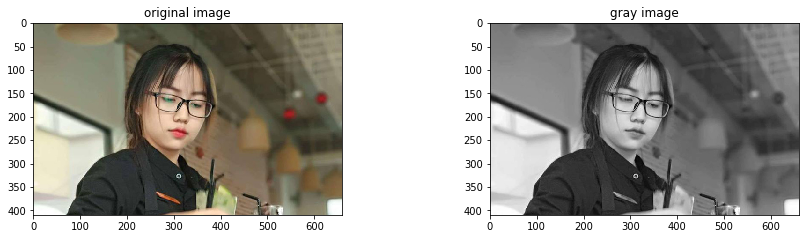

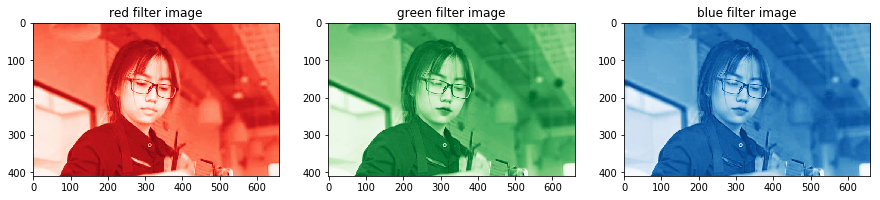

In [4]:
#Read image from file
img_BGR = cv2.imread("yenly.png")
#Convert from BGR to RGB mode
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
#Convert to gray scale
img_gray = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

print("Original Image Source: soha.vn")

plt.figure(figsize = (15, 12))

plt.subplot(321) #subplot(nrows, ncols, plot_number) || subplot(nrows+ncols+plot_number)
plt.imshow(img_RGB)
plt.title("original image")

plt.subplot(322)
plt.imshow(img_gray, cmap =  "gray")
plt.title("gray image")

plt.figure(figsize = (15, 12))
imgred = img_RGB[:,:,0]
plt.subplot(131)
plt.title("red filter image")
plt.imshow(imgred, cmap = "Reds_r")

imggreen = img_RGB[:,:,1]
plt.subplot(132)
plt.title("green filter image")
plt.imshow(imggreen, cmap = "Greens_r")

imgblue = img_RGB[:,:,2]
plt.subplot(133)
plt.title("blue filter image")
plt.imshow(imgblue, cmap = "Blues_r")
plt.show()

# 3. SVD Processing: (Use Module Linalg)

## 3.1 Gray Image:

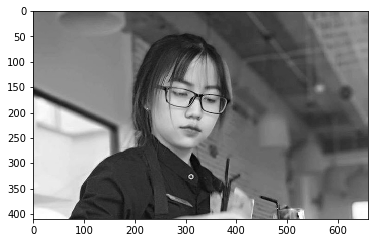

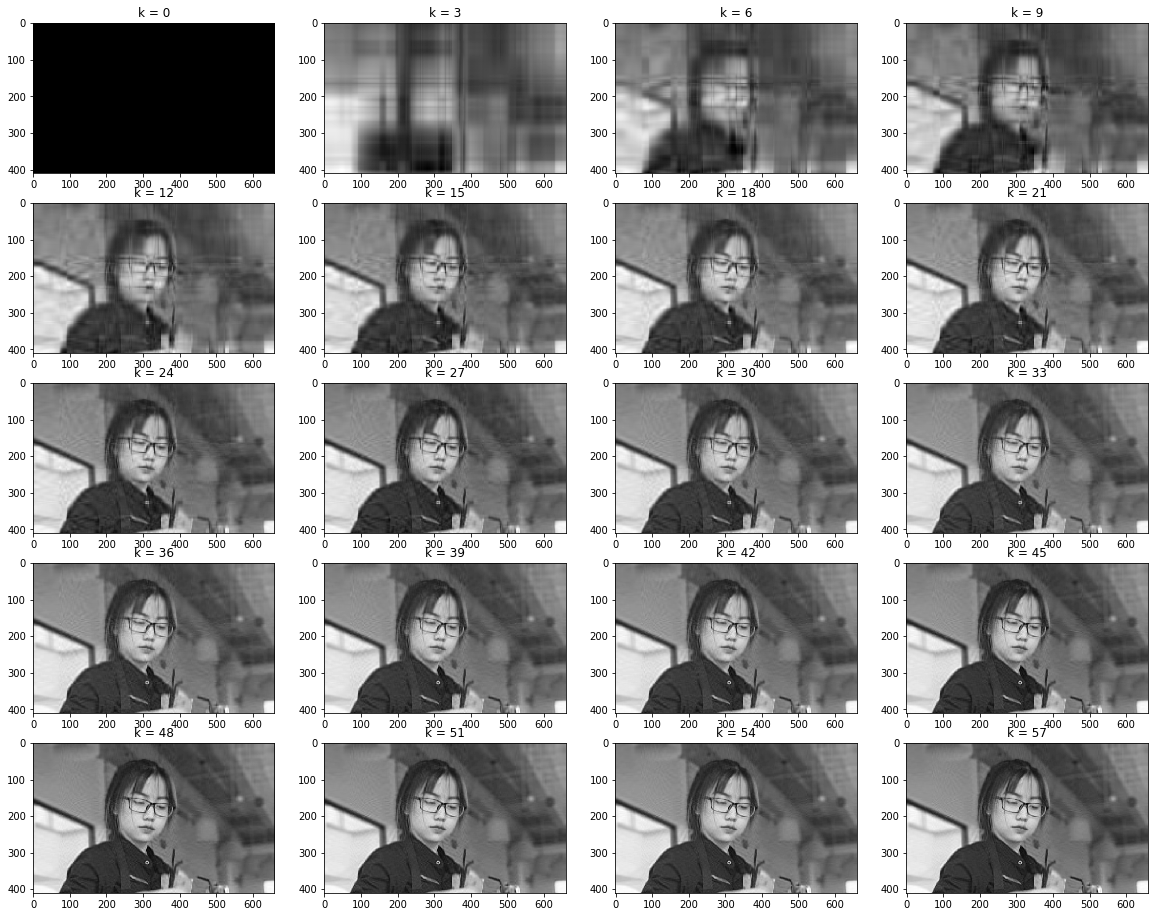

In [3]:
U, S, V = linalg.svd(img_gray)

# print("U = ", U)
# print(U.shape)
# print("S = ", S)
# print(S.shape)
# print("V = ", V)
# print(V.shape)

plt.imshow(img_gray, cmap = "gray")

plt.figure(figsize = (20, 16))

slot = 1
for k in range (0, 60, 3):
    compressed_img = (np.matrix(U[:, :k]).dot(np.diag(S[:k]))).dot(np.matrix(V[:k, :]))
    plt.subplot(5, 4, slot)
    plt.imshow(compressed_img , cmap = "gray")
    plt.title("k = " + str(k))
    slot += 1
plt.show()

## 3.2 RGB Image:

### 3.2.1 Red channel: 

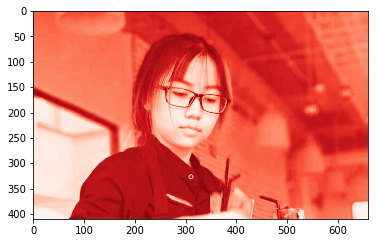

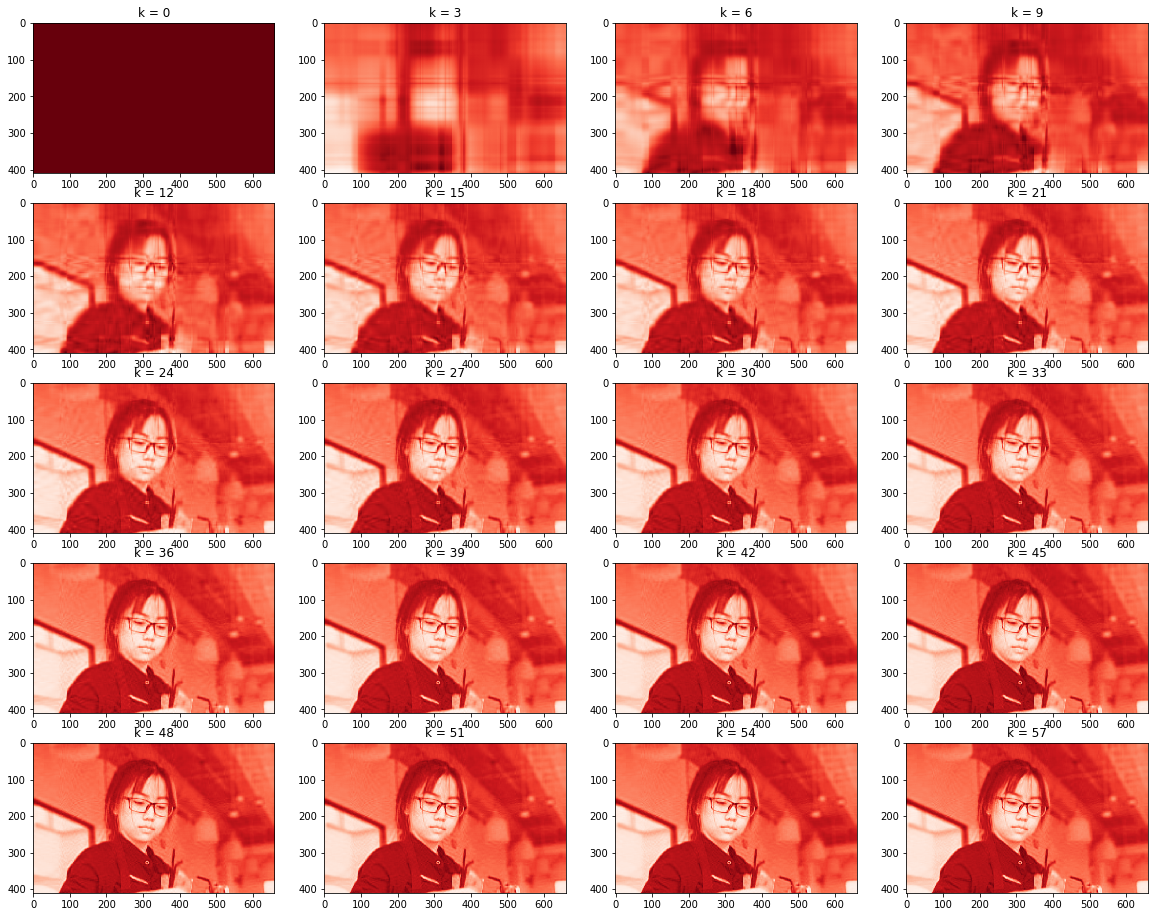

In [4]:
U, S, V = linalg.svd(imgred)

# print(imgred.shape)
# print(U.shape)
# print(S.shape)
# print(V.shape)
plt.imshow(imgred, cmap = "Reds_r")

plt.figure(figsize = (20, 16))

slot = 1
for k in range (0, 60, 3):
    compressed_imgred = (np.matrix(U[:, :k]).dot(np.diag(S[:k]))).dot(np.matrix(V[:k, :]))
    plt.subplot(5, 4, slot)
    plt.imshow(compressed_imgred, cmap = "Reds_r")
    plt.title("k = " + str(k))
    slot += 1
plt.show()

### 3.2.2 Green channel:

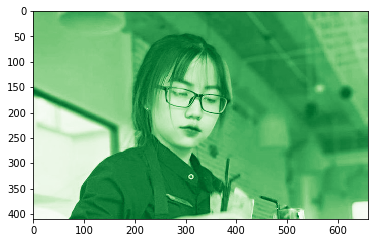

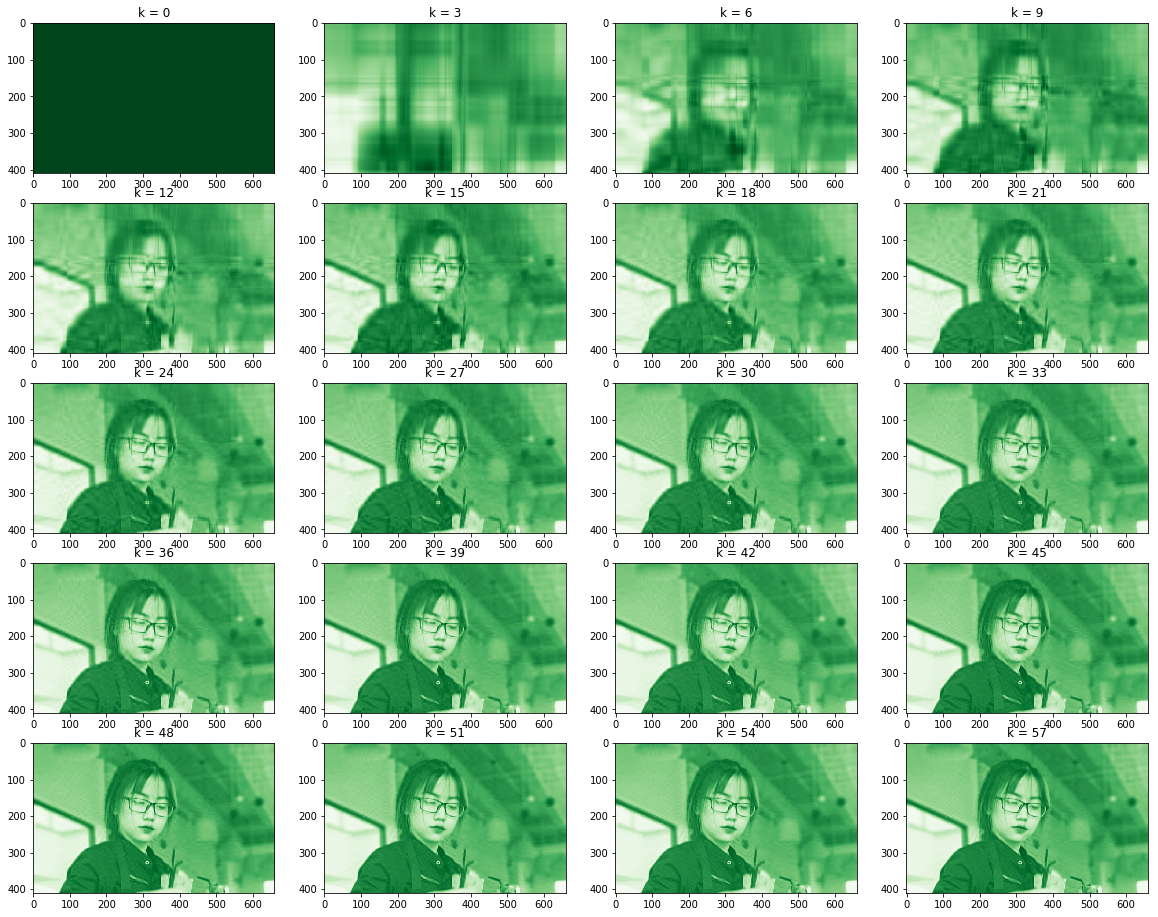

In [5]:
U, S, V = linalg.svd(imggreen)

# print(imggreen.shape)
# print(U.shape)
# print(S.shape)
# print(V.shape)
plt.imshow(imggreen, cmap = "Greens_r")

plt.figure(figsize = (20, 16))

slot = 1
for k in range (0, 60, 3):
    compressed_imggreen = (np.matrix(U[:, :k]).dot(np.diag(S[:k]))).dot(np.matrix(V[:k, :]))
    plt.subplot(5, 4, slot)
    plt.imshow(compressed_imggreen, cmap = "Greens_r")
    plt.title("k = " + str(k))
    slot += 1
plt.show()

### 3.2.3 Blue channel:

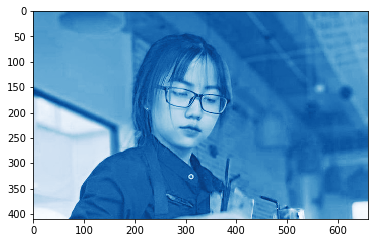

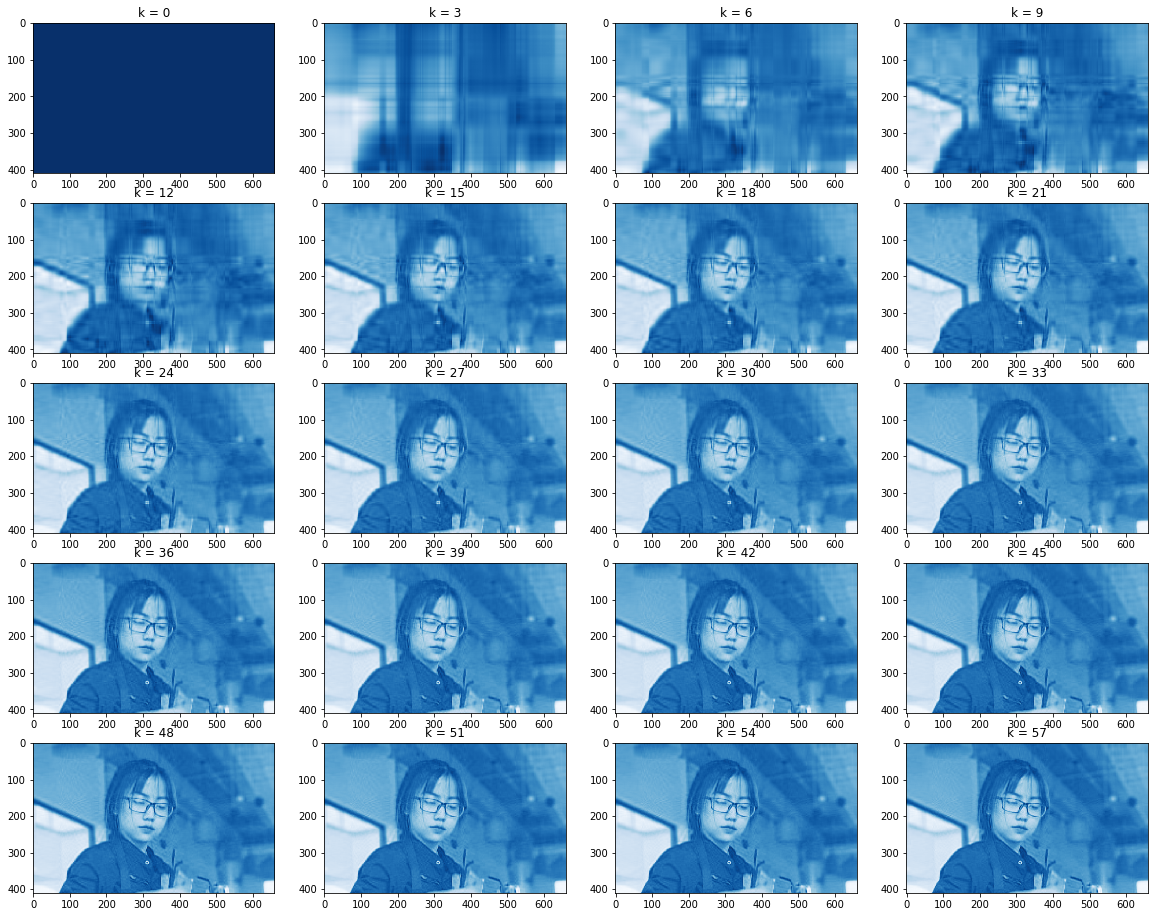

In [8]:
U, S, V = linalg.svd(imgblue)

# print(imgblue.shape)
# print(U.shape)
# print(S.shape)
# print(V.shape)
plt.imshow(imgblue, cmap = "Blues_r")

plt.figure(figsize = (20, 16))

slot = 1
for k in range (0, 60, 3):
    compressed_imgblue = (np.matrix(U[:, :k]).dot(np.diag(S[:k]))).dot(np.matrix(V[:k, :]))
    plt.subplot(5, 4, slot)
    plt.imshow(compressed_imgblue, cmap = "Blues_r")
    plt.title("k = " + str(k))
    slot += 1
plt.show()

### 3.2.4 Merge R G B channels into an image:

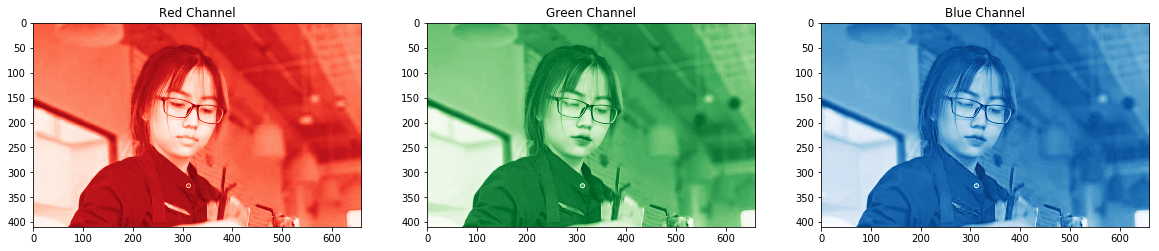

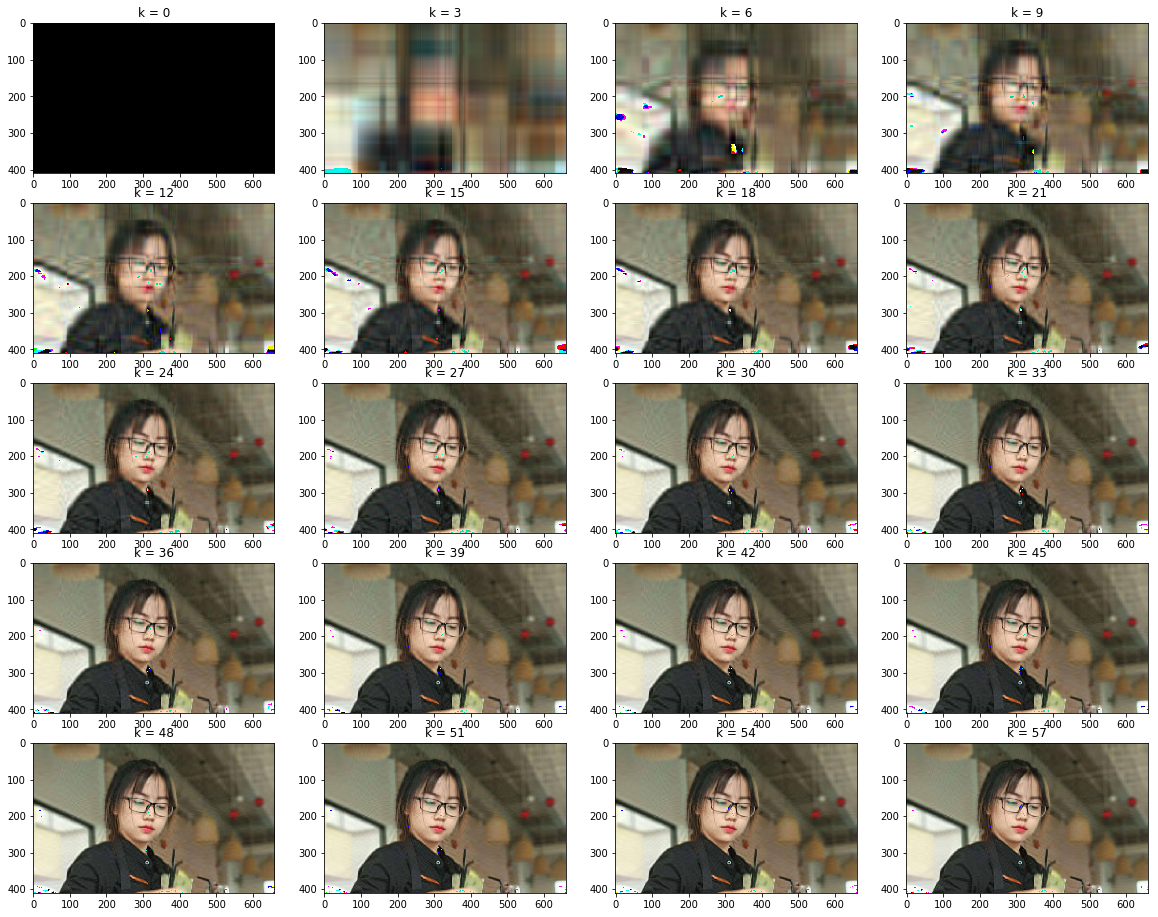

In [6]:
Ur, Sr, Vr = linalg.svd(imgred)
Ug, Sg, Vg = linalg.svd(imggreen)
Ub, Sb, Vb = linalg.svd(imgblue)

plt.figure(figsize = (20, 16))
plt.subplot(131)
plt.title("Red Channel")
plt.imshow(imgred, cmap = "Reds_r")
plt.subplot(132)
plt.title("Green Channel")
plt.imshow(imggreen, cmap = "Greens_r")
plt.subplot(133)
plt.title("Blue Channel")
plt.imshow(imgblue, cmap = "Blues_r")

plt.figure(figsize = (20, 16))

compressed_BGR = img_BGR.copy()
compressed_RGB = img_RGB.copy()

slot = 1
for k in range (0, 60, 3):
    compressed_imgred = (np.matrix(Ur[:, :k]).dot(np.diag(Sr[:k]))).dot(np.matrix(Vr[:k, :]))
    compressed_imggreen = (np.matrix(Ug[:, :k]).dot(np.diag(Sg[:k]))).dot(np.matrix(Vg[:k, :]))
    compressed_imgblue = (np.matrix(Ub[:, :k]).dot(np.diag(Sb[:k]))).dot(np.matrix(Vb[:k, :]))

    compressed_BGR[:,:,0] = compressed_imgblue
    compressed_BGR[:,:,1] = compressed_imggreen
    compressed_BGR[:,:,2] = compressed_imgred

    compressed_RGB = cv2.cvtColor(compressed_BGR, cv2.COLOR_BGR2RGB) #convert to RGB for plt.show() as right colors

    plt.subplot(5, 4, slot)
    plt.imshow(compressed_RGB)
    plt.title("k = " + str(k))
    slot += 1

#     cv2.imwrite("Results/k%i.jpg"%k, compressed_BGR) #write results with BGR image for fitting opencv image format
# cv2.imwrite("Results/ori.jpg", img_BGR) #write original image
plt.show()

In Results folder, there are results of 60 images, ranging from k = 0 to k = 177, with step of 3.